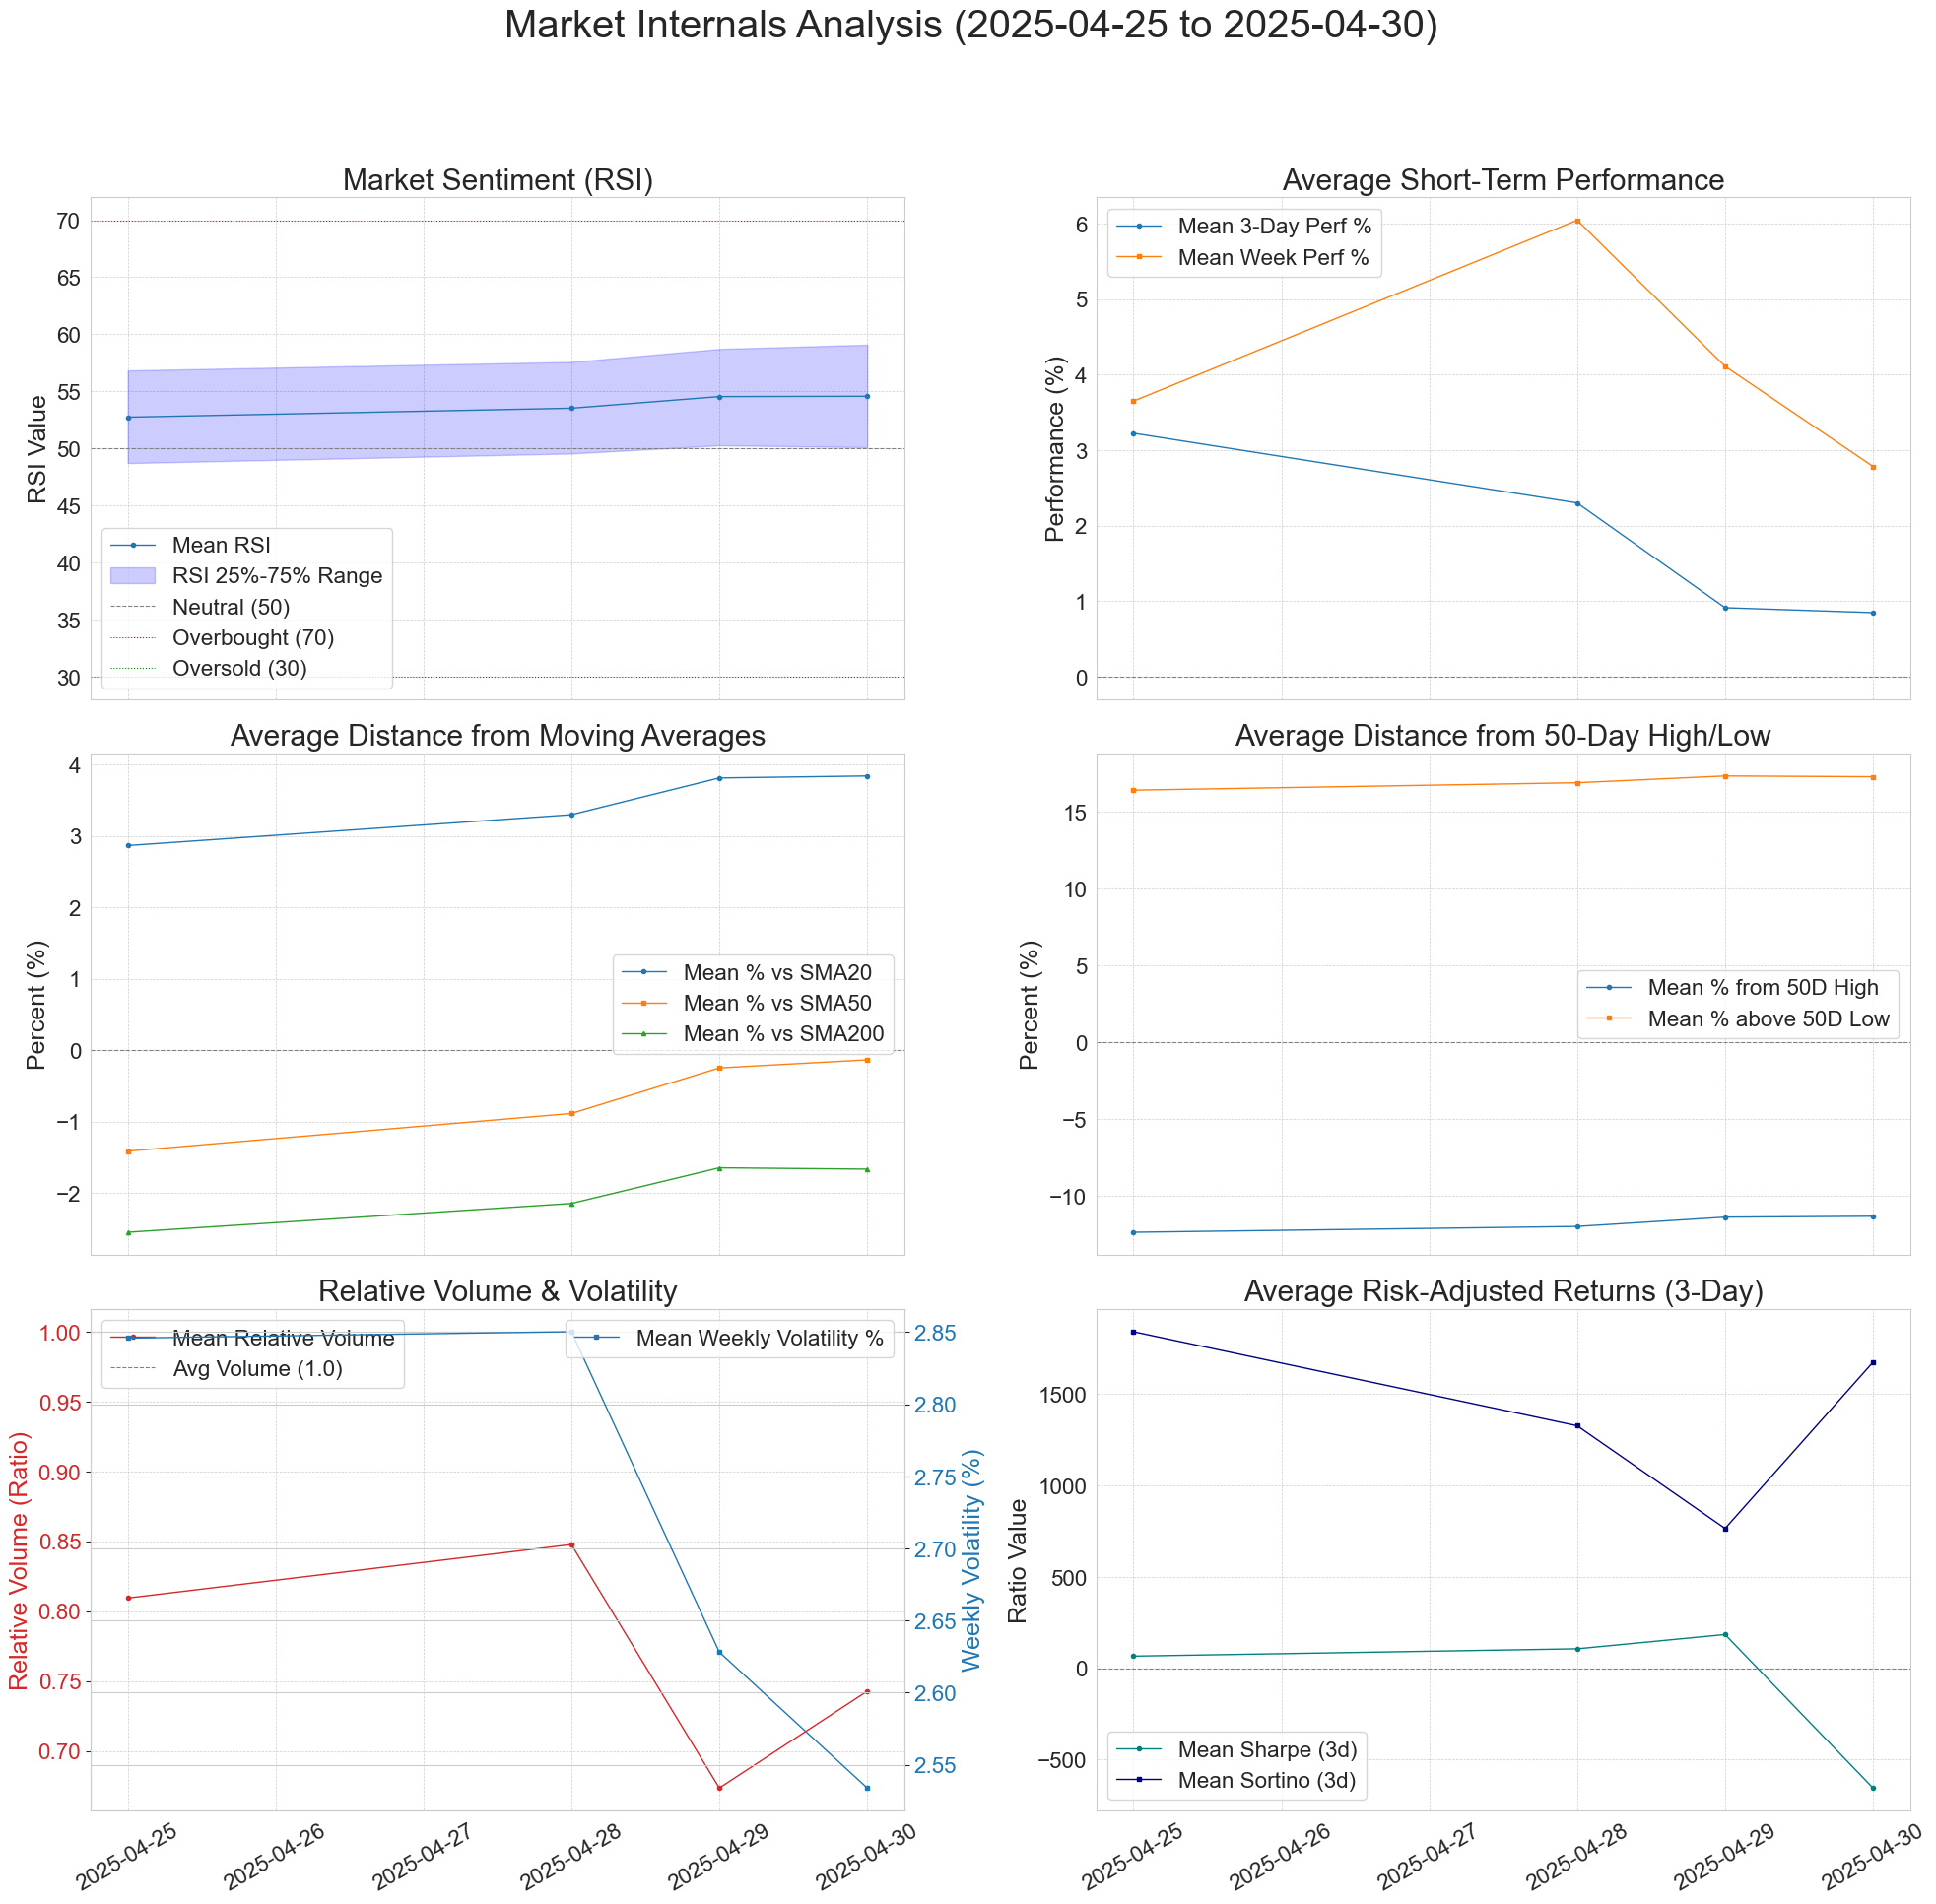

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # Import necessary date tools
import seaborn as sns
import warnings

# Suppress potential warnings from seaborn/matplotlib if versions are slightly off
warnings.simplefilter(action='ignore', category=FutureWarning)

# --- Configuration ---
FILE_PATH = 'market_daily_summary_stats_history.csv'
# START_DATE = '2025-04-01' # No longer used for filtering
# END_DATE = '2025-04-07'   # No longer used for filtering

# --- Font Size Configuration ---
# Adjust these values as needed
FONT_SCALE = 1.8
TITLE_FONTSIZE = 16 * FONT_SCALE  # Main title
SUBPLOT_TITLE_FONTSIZE = 12 * FONT_SCALE
AXIS_LABEL_FONTSIZE = 10 * FONT_SCALE
TICK_LABEL_FONTSIZE = 9 * FONT_SCALE
LEGEND_FONTSIZE = 9 * FONT_SCALE

# Update matplotlib's runtime configuration parameters for fonts
plt.rcParams.update({
    'font.size': TICK_LABEL_FONTSIZE,          # Default text size
    'axes.titlesize': SUBPLOT_TITLE_FONTSIZE,  # Subplot title size
    'axes.labelsize': AXIS_LABEL_FONTSIZE,     # X and Y axis labels
    'xtick.labelsize': TICK_LABEL_FONTSIZE,    # X-axis tick labels
    'ytick.labelsize': TICK_LABEL_FONTSIZE,    # Y-axis tick labels
    'legend.fontsize': LEGEND_FONTSIZE,        # Legend text
    'figure.titlesize': TITLE_FONTSIZE         # Figure title (suptitle)
})


# --- Load and Prepare Data ---
try:
    df = pd.read_csv(FILE_PATH)
except FileNotFoundError:
    print(f"Error: File not found at '{FILE_PATH}'")
    exit()
except Exception as e:
    print(f"Error reading CSV file: {e}")
    exit()

# Convert 'Date' column to datetime objects
try:
    df['Date'] = pd.to_datetime(df['Date'])
except KeyError:
    print("Error: 'Date' column not found in the CSV.")
    exit()
except Exception as e:
    print(f"Error converting 'Date' column: {e}")
    exit()

# Sort by date just in case it's not already sorted
df = df.sort_values('Date')

# Set Date as index
df = df.set_index('Date')

# --- NO DATE FILTERING ---
# We will use the entire DataFrame 'df' for plotting
# df_period = df.loc[START_DATE:END_DATE].copy() # <-- REMOVED THIS LINE

if df.empty:
    print(f"Error: No data found in the file '{FILE_PATH}' after processing.")
    exit()

# Get the actual start and end dates from the data for the title
actual_start_date = df.index.min().strftime('%Y-%m-%d')
actual_end_date = df.index.max().strftime('%Y-%m-%d')

# --- Plotting ---
sns.set_style("whitegrid") # Use seaborn's styling for nicer plots

# Determine number of plots needed
num_plots = 6
# Increased figsize slightly to potentially accommodate larger fonts and longer x-axis
fig, axes = plt.subplots(nrows=num_plots // 2, ncols=2, figsize=(20, 19), sharex=True) # Increased width
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# --- Plot 1: Sentiment (RSI Mean and Range) ---
ax = axes[0]
# Use 'df' instead of 'df_period'
ax.plot(df.index, df['RSI_mean'], label='Mean RSI', marker='o', markersize=3, linestyle='-', linewidth=1) # Adjust marker/line for potentially more points
ax.fill_between(df.index, df['RSI_25%'], df['RSI_75%'],
                color='blue', alpha=0.2, label='RSI 25%-75% Range')
ax.axhline(50, color='grey', linestyle='--', linewidth=0.8, label='Neutral (50)')
ax.axhline(70, color='red', linestyle=':', linewidth=0.8, label='Overbought (70)')
ax.axhline(30, color='green', linestyle=':', linewidth=0.8, label='Oversold (30)')
ax.set_title('Market Sentiment (RSI)')
ax.set_ylabel('RSI Value')
ax.legend()

# --- Plot 2: Short-Term Performance ---
ax = axes[1]
# Use 'df' instead of 'df_period'
ax.plot(df.index, df['Perf 3D %_mean'], label='Mean 3-Day Perf %', marker='o', markersize=3, linestyle='-', linewidth=1)
ax.plot(df.index, df['Perf Week %_mean'], label='Mean Week Perf %', marker='s', markersize=3, linestyle='-', linewidth=1)
ax.axhline(0, color='grey', linestyle='--', linewidth=0.8)
ax.set_title('Average Short-Term Performance')
ax.set_ylabel('Performance (%)')
ax.legend()

# --- Plot 3: Technical Health (vs SMAs) ---
ax = axes[2]
# Use 'df' instead of 'df_period'
ax.plot(df.index, df['SMA20 %_mean'], label='Mean % vs SMA20', marker='o', markersize=3, linestyle='-', linewidth=1)
ax.plot(df.index, df['SMA50 %_mean'], label='Mean % vs SMA50', marker='s', markersize=3, linestyle='-', linewidth=1)
ax.plot(df.index, df['SMA200 %_mean'], label='Mean % vs SMA200', marker='^', markersize=3, linestyle='-', linewidth=1)
ax.axhline(0, color='grey', linestyle='--', linewidth=0.8)
ax.set_title('Average Distance from Moving Averages')
ax.set_ylabel('Percent (%)')
ax.legend()

# --- Plot 4: Technical Health (vs Highs/Lows) ---
ax = axes[3]
# Use 'df' instead of 'df_period'
ax.plot(df.index, df['50D High %_mean'], label='Mean % from 50D High', marker='o', markersize=3, linestyle='-', linewidth=1)
ax.plot(df.index, df['50D Low %_mean'], label='Mean % above 50D Low', marker='s', markersize=3, linestyle='-', linewidth=1)
ax.axhline(0, color='grey', linestyle='--', linewidth=0.8)
ax.set_title('Average Distance from 50-Day High/Low')
ax.set_ylabel('Percent (%)')
ax.legend()

# --- Plot 5: Volume Confirmation & Volatility ---
ax = axes[4]
color = 'tab:red'
ax.set_ylabel('Relative Volume (Ratio)', color=color)
# Use 'df' instead of 'df_period'
ax.plot(df.index, df['Rel Volume_mean'], label='Mean Relative Volume', marker='o', markersize=3, linestyle='-', linewidth=1, color=color)
ax.tick_params(axis='y', labelcolor=color)
ax.axhline(1, color='grey', linestyle='--', linewidth=0.8, label='Avg Volume (1.0)')
ax.legend(loc='upper left')

ax2 = ax.twinx()
color = 'tab:blue'
ax2.set_ylabel('Weekly Volatility (%)', color=color)
# Use 'df' instead of 'df_period'
ax2.plot(df.index, df['Volatility W %_mean'], label='Mean Weekly Volatility %', marker='s', markersize=3, linestyle='-', linewidth=1, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')
ax.set_title('Relative Volume & Volatility')

# --- Plot 6: Risk-Adjusted Returns (Short Term) ---
ax = axes[5]
# Use 'df' instead of 'df_period'
ax.plot(df.index, df['Sharpe 3d_mean'], label='Mean Sharpe (3d)', marker='o', markersize=3, linestyle='-', linewidth=1, color='teal')
ax.plot(df.index, df['Sortino 3d_mean'], label='Mean Sortino (3d)', marker='s', markersize=3, linestyle='-', linewidth=1, color='navy')
ax.axhline(0, color='grey', linestyle='--', linewidth=0.8)
ax.set_title('Average Risk-Adjusted Returns (3-Day)')
ax.set_ylabel('Ratio Value')
ax.legend()


# --- Final Touches ---
# Improve date formatting on x-axis for potentially long periods
for ax in axes:
    # Use AutoDateLocator to automatically choose sensible tick positions
    locator = mdates.AutoDateLocator(minticks=5, maxticks=10) # Adjust density as needed
    formatter = mdates.AutoDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    # ax.xaxis.set_major_locator(mdates.DayLocator(interval=1)) # Old locator - too dense for long periods
    # ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # Old formatter
    ax.tick_params(axis='x', rotation=30) # Rotate labels slightly. Size controlled by rcParams
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the main title using the actual date range from the data
plt.suptitle(f'Market Internals Analysis ({actual_start_date} to {actual_end_date})', y=1.02) # Updated title
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent title overlap
plt.show()

In [2]:
# process_files.py
from config import date_str, DOWNLOAD_DIR, DEST_DIR
from pathlib import Path  # Better path handling

print(f"date_str: {date_str}")
print(f"DOWNLOAD_DIR: {DOWNLOAD_DIR}")
print(f"DEST_DIR: {DEST_DIR}\n")

# Build paths
# ohlcv_path = Path(DEST_DIR) / f'{date_str}_df_OHLCV_clean_stocks_etfs.parquet'
# source_path = Path(DEST_DIR) / f'{date_str}_df_finviz_n_ratios_stocks_etfs.parquet'
dest_path = Path(DEST_DIR) / f'{date_str}_df_finviz_merged_stocks_etfs.parquet'
# tickers_path = Path(DEST_DIR) / f'{date_str}_df_common_tickers_stocks_etfs.parquet'

# print(f"ohlcv_path: {ohlcv_path}")
# print(f"source_path: {source_path}")
print(f"dest_path: {dest_path}")
# print(f"tickers_path: {tickers_path}")

date_str: 2025-04-30
DOWNLOAD_DIR: C:\Users\ping\Downloads
DEST_DIR: ..\data

dest_path: ..\data\2025-04-30_df_finviz_merged_stocks_etfs.parquet


In [4]:
import pandas as pd
# Set pandas display options to show more columns and rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 2000)        # Let the display adjust to the window
pd.set_option('display.max_colwidth', None) # Show full content of each cell
pd.set_option('display.max_rows', 200)
pd.set_option('display.float_format', '{:.4f}'.format)

In [11]:
df_data = pd.read_parquet(dest_path)
print(df_data.head())

        No.                Company               Index                  Sector                        Industry Country Exchange  Market Cap, M     P/E  Fwd P/E    PEG     P/S     P/B     P/C   P/FCF  Book/sh  Cash/sh  Dividend %  Dividend TTM Dividend Ex Date  Payout Ratio %     EPS  EPS next Q  EPS this Y %  EPS next Y %  EPS past 5Y %  EPS next 5Y %  Sales past 5Y %  Sales Q/Q %  EPS Q/Q %  EPS YoY TTM %  Sales YoY TTM %    Sales, M   Income, M  EPS Surprise %  Revenue Surprise %  Outstanding, M   Float, M  Float %  Insider Own %  Insider Trans %  Inst Own %  Inst Trans %  Short Float %  Short Ratio  Short Interest, M   ROA %    ROE %   ROI %  Curr R  Quick R  LTDebt/Eq  Debt/Eq  Gross M %  Oper M %  Profit M %  Perf 3D %  Perf Week %  Perf Month %  Perf Quart %  Perf Half %  Perf Year %  Perf YTD %   Beta     ATR  ATR/Price %  Volatility W %  Volatility M %  SMA20 %  SMA50 %  SMA200 %  50D High %  50D Low %  52W High %  52W Low %        52W Range  All-Time High %  All-Time Low %    

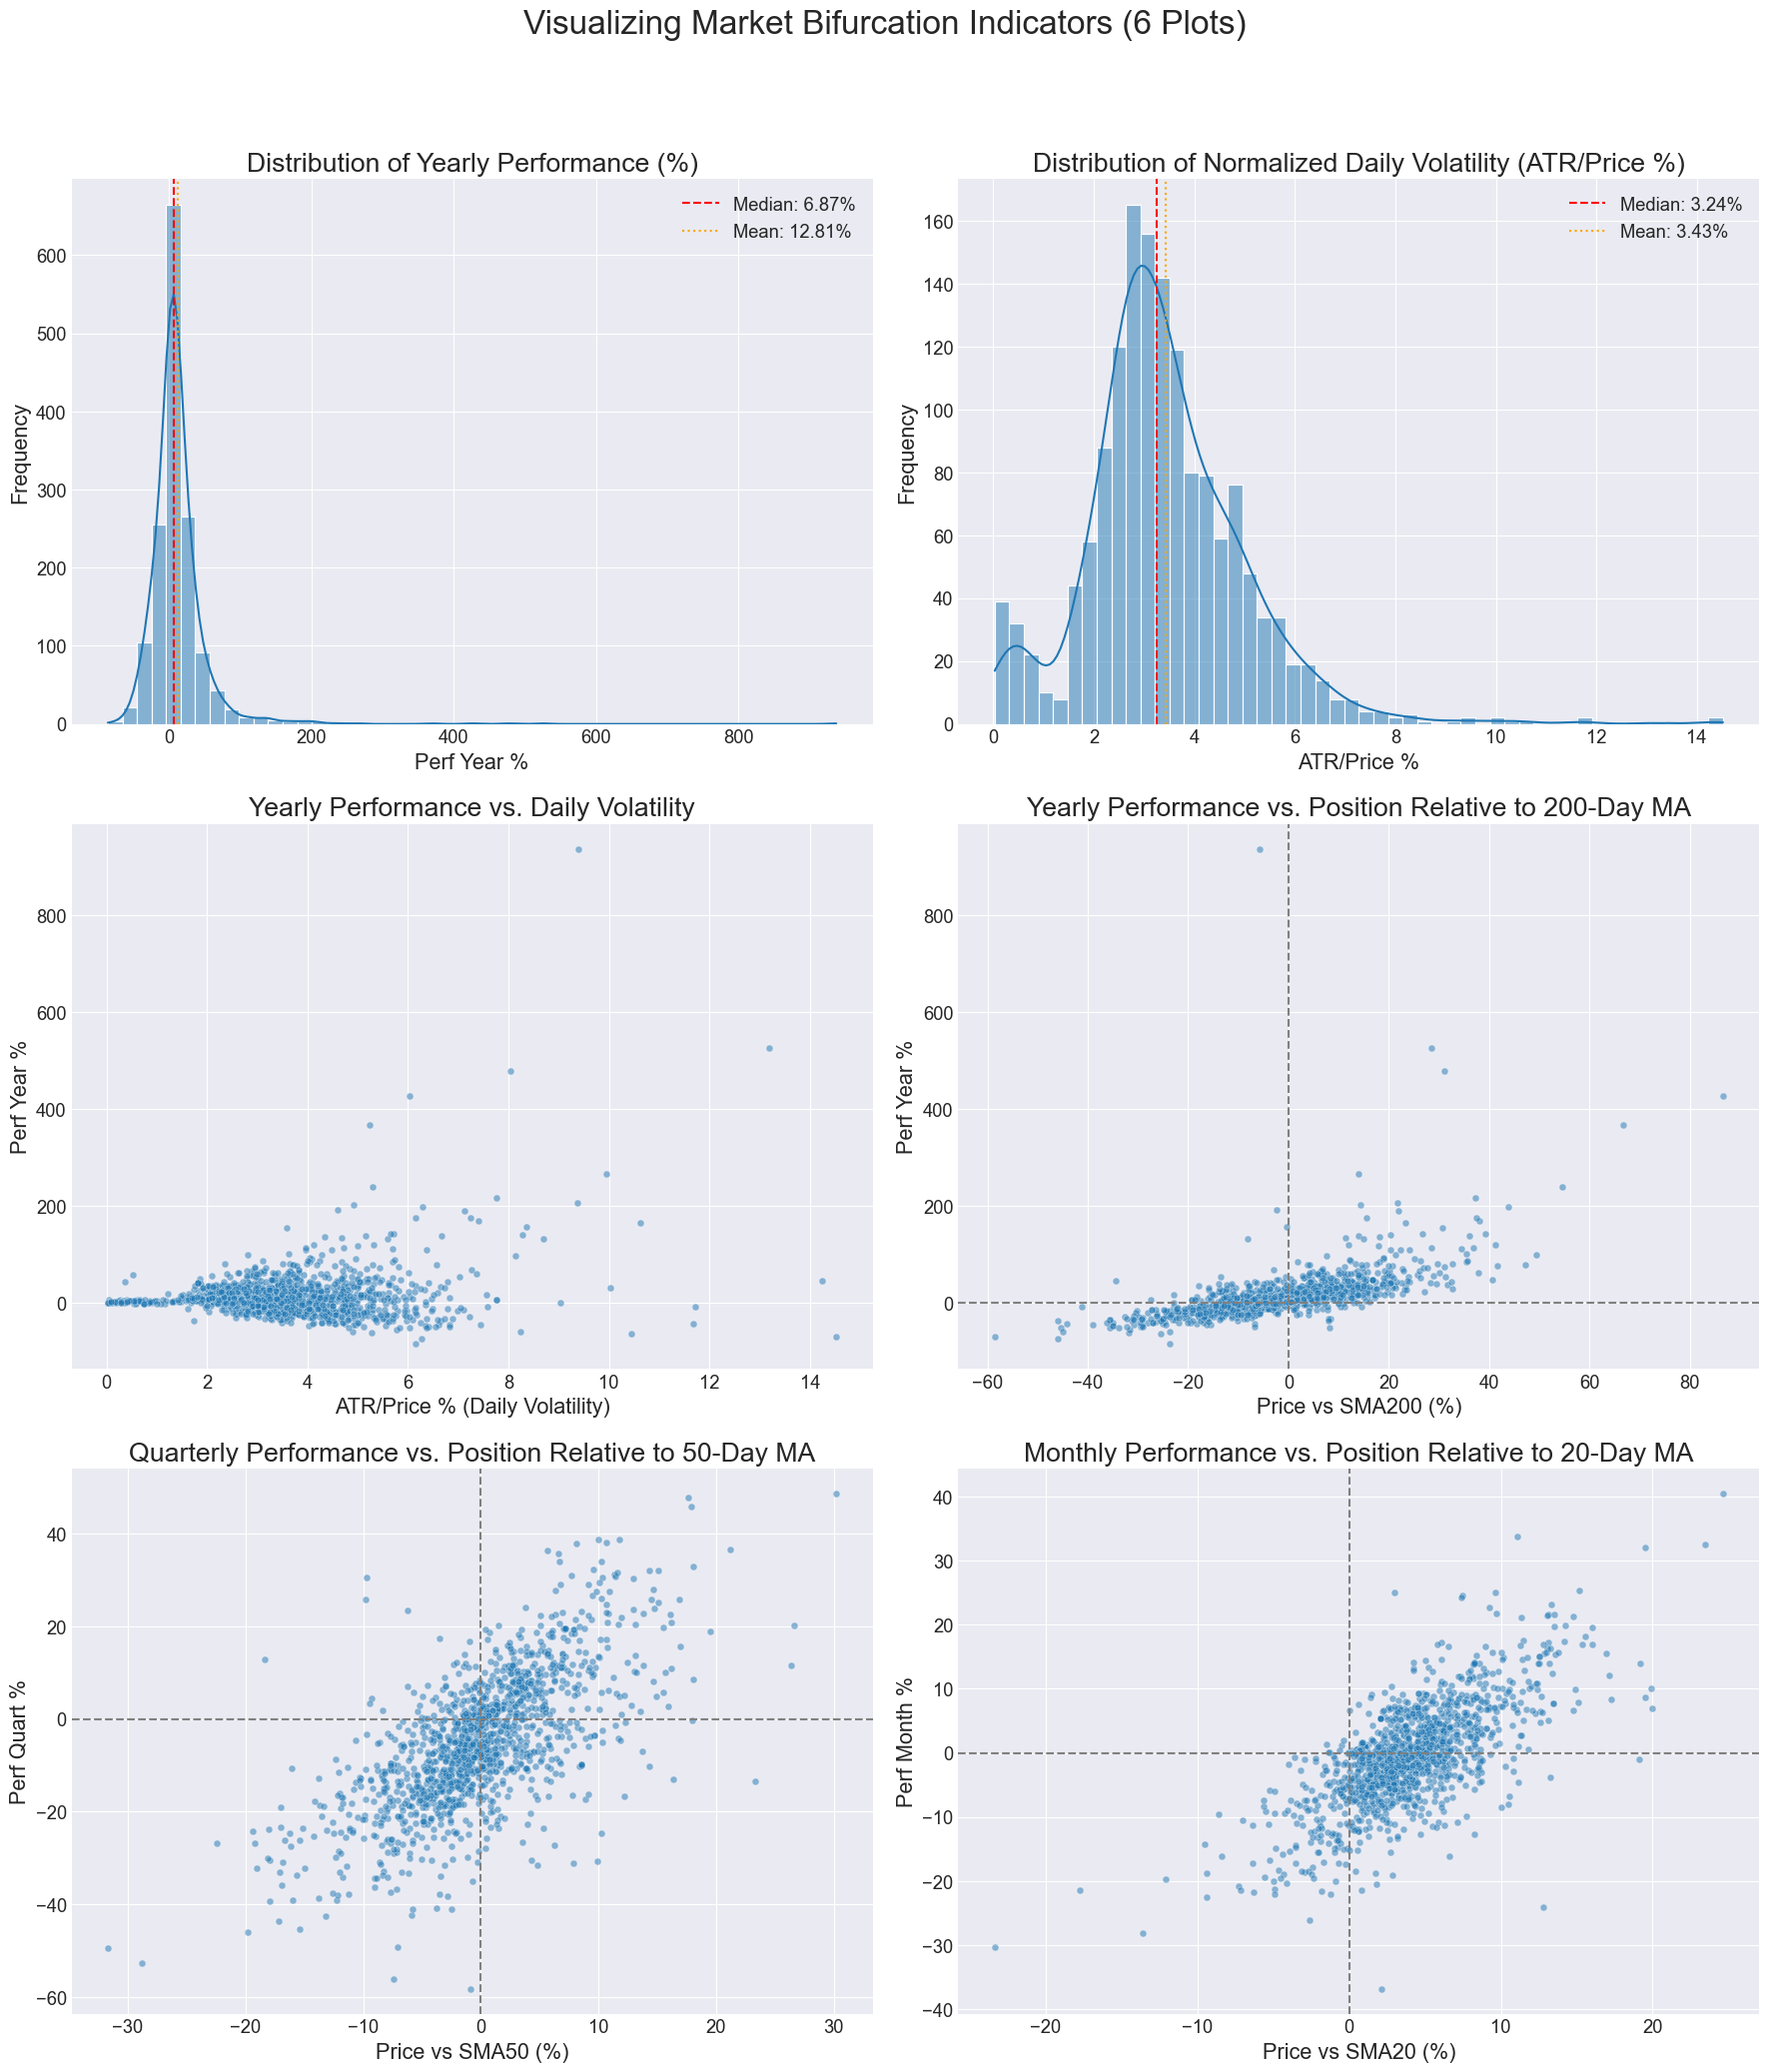

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Will be used if we need to handle potential infinite values if any

# --- IMPORTANT ---
# Ensure your DataFrame is named df_data and contains the columns used below,
# including 'Perf Year %', 'ATR/Price %', 'SMA200 %',
# 'SMA50 %', 'Perf Quart %', 'SMA20 %', 'Perf Month %'.
# Example: (replace this with your actual data loading)
# df_data = pd.read_csv('your_market_data.csv')

# --- Data Cleaning (Optional but Recommended) ---
# Replace potential infinite values with NaN
df_data.replace([np.inf, -np.inf], np.nan, inplace=True)
# Use a copy to avoid modifying original if needed later
df_plot = df_data.copy()

# --- Font Size Definitions ---
SCALE_FONTSIZE = 1.2  # Scale factor for font sizes
TITLE_FONTSIZE = 16 * SCALE_FONTSIZE # Slightly smaller for 6 plots
AXIS_LABEL_FONTSIZE = 13 * SCALE_FONTSIZE
TICK_LABEL_FONTSIZE = 11 * SCALE_FONTSIZE
LEGEND_FONTSIZE = 11 * SCALE_FONTSIZE
SUPTITLE_FONTSIZE = 20 * SCALE_FONTSIZE

# --- Visualization ---

plt.style.use('seaborn-v0_8-darkgrid') # Use a visually appealing style
# Change to 3 rows, 2 columns, adjust figsize height
fig, axes = plt.subplots(3, 2, figsize=(18, 21)) # Increased height for 3 rows
fig.suptitle('Visualizing Market Bifurcation Indicators (6 Plots)', fontsize=SUPTITLE_FONTSIZE, y=1.01) # Adjust y if needed

# Flatten axes array for easier iteration if needed, or use direct indexing
# axes = axes.flatten() # Optional: makes it axes[0] to axes[5]
# We will use direct indexing [row, col] for clarity

# 1. Histogram of Yearly Performance ('Perf Year %')
sns.histplot(data=df_plot, x='Perf Year %', kde=True, ax=axes[0, 0], bins=50)
axes[0, 0].set_title('Distribution of Yearly Performance (%)', fontsize=TITLE_FONTSIZE)
axes[0, 0].set_xlabel('Perf Year %', fontsize=AXIS_LABEL_FONTSIZE)
axes[0, 0].set_ylabel('Frequency', fontsize=AXIS_LABEL_FONTSIZE)
axes[0, 0].tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONTSIZE)
median_val = df_plot['Perf Year %'].median()
mean_val = df_plot['Perf Year %'].mean()
axes[0, 0].axvline(median_val, color='red', linestyle='--', label=f'Median: {median_val:.2f}%')
axes[0, 0].axvline(mean_val, color='orange', linestyle=':', label=f'Mean: {mean_val:.2f}%')
axes[0, 0].legend(fontsize=LEGEND_FONTSIZE)

# 2. Histogram of Normalized Volatility ('ATR/Price %')
sns.histplot(data=df_plot, x='ATR/Price %', kde=True, ax=axes[0, 1], bins=50)
axes[0, 1].set_title('Distribution of Normalized Daily Volatility (ATR/Price %)', fontsize=TITLE_FONTSIZE)
axes[0, 1].set_xlabel('ATR/Price %', fontsize=AXIS_LABEL_FONTSIZE)
axes[0, 1].set_ylabel('Frequency', fontsize=AXIS_LABEL_FONTSIZE)
axes[0, 1].tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONTSIZE)
median_val = df_plot['ATR/Price %'].median()
mean_val = df_plot['ATR/Price %'].mean()
axes[0, 1].axvline(median_val, color='red', linestyle='--', label=f'Median: {median_val:.2f}%')
axes[0, 1].axvline(mean_val, color='orange', linestyle=':', label=f'Mean: {mean_val:.2f}%')
axes[0, 1].legend(fontsize=LEGEND_FONTSIZE)

# 3. Scatter Plot: Yearly Performance vs. Normalized Volatility
sns.scatterplot(data=df_plot, x='ATR/Price %', y='Perf Year %', ax=axes[1, 0], alpha=0.5, s=25)
axes[1, 0].set_title('Yearly Performance vs. Daily Volatility', fontsize=TITLE_FONTSIZE)
axes[1, 0].set_xlabel('ATR/Price % (Daily Volatility)', fontsize=AXIS_LABEL_FONTSIZE)
axes[1, 0].set_ylabel('Perf Year %', fontsize=AXIS_LABEL_FONTSIZE)
axes[1, 0].tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONTSIZE)

# 4. Scatter Plot: Yearly Performance vs. Distance from 200-Day MA
sns.scatterplot(data=df_plot, x='SMA200 %', y='Perf Year %', ax=axes[1, 1], alpha=0.5, s=25)
axes[1, 1].set_title('Yearly Performance vs. Position Relative to 200-Day MA', fontsize=TITLE_FONTSIZE)
axes[1, 1].set_xlabel('Price vs SMA200 (%)', fontsize=AXIS_LABEL_FONTSIZE)
axes[1, 1].set_ylabel('Perf Year %', fontsize=AXIS_LABEL_FONTSIZE)
axes[1, 1].tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONTSIZE)
axes[1, 1].axvline(0, color='grey', linestyle='--') # Line at 0% (on the SMA200)
axes[1, 1].axhline(0, color='grey', linestyle='--') # Line at 0% Perf Year

# --- ADDED PLOTS ---

# 5. Scatter Plot: Quarterly Performance vs. Distance from 50-Day MA
# Ensure 'SMA50 %' and 'Perf Quart %' columns exist in df_plot
if 'SMA50 %' in df_plot.columns and 'Perf Quart %' in df_plot.columns:
    sns.scatterplot(data=df_plot, x='SMA50 %', y='Perf Quart %', ax=axes[2, 0], alpha=0.5, s=25)
    axes[2, 0].set_title('Quarterly Performance vs. Position Relative to 50-Day MA', fontsize=TITLE_FONTSIZE)
    axes[2, 0].set_xlabel('Price vs SMA50 (%)', fontsize=AXIS_LABEL_FONTSIZE)
    axes[2, 0].set_ylabel('Perf Quart %', fontsize=AXIS_LABEL_FONTSIZE)
    axes[2, 0].tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONTSIZE)
    axes[2, 0].axvline(0, color='grey', linestyle='--') # Line at 0% (on the SMA50)
    axes[2, 0].axhline(0, color='grey', linestyle='--') # Line at 0% Perf Quart
else:
    axes[2, 0].text(0.5, 0.5, "Columns 'SMA50 %' or 'Perf Quart %' not found",
                  ha='center', va='center', fontsize=TITLE_FONTSIZE, color='red')
    axes[2, 0].set_title('Error: Missing Data', fontsize=TITLE_FONTSIZE)


# 6. Scatter Plot: Monthly Performance vs. Distance from 20-Day MA
# Ensure 'SMA20 %' and 'Perf Month %' columns exist in df_plot
if 'SMA20 %' in df_plot.columns and 'Perf Month %' in df_plot.columns:
    sns.scatterplot(data=df_plot, x='SMA20 %', y='Perf Month %', ax=axes[2, 1], alpha=0.5, s=25)
    axes[2, 1].set_title('Monthly Performance vs. Position Relative to 20-Day MA', fontsize=TITLE_FONTSIZE)
    axes[2, 1].set_xlabel('Price vs SMA20 (%)', fontsize=AXIS_LABEL_FONTSIZE)
    axes[2, 1].set_ylabel('Perf Month %', fontsize=AXIS_LABEL_FONTSIZE)
    axes[2, 1].tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONTSIZE)
    axes[2, 1].axvline(0, color='grey', linestyle='--') # Line at 0% (on the SMA20)
    axes[2, 1].axhline(0, color='grey', linestyle='--') # Line at 0% Perf Month
else:
    axes[2, 1].text(0.5, 0.5, "Columns 'SMA20 %' or 'Perf Month %' not found",
                  ha='center', va='center', fontsize=TITLE_FONTSIZE, color='red')
    axes[2, 1].set_title('Error: Missing Data', fontsize=TITLE_FONTSIZE)


# --- Final Adjustments ---
plt.tight_layout(rect=[0, 0.02, 1, 0.98]) # Adjust layout slightly for suptitle and bottom labels
plt.show()